In [1]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Naomi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

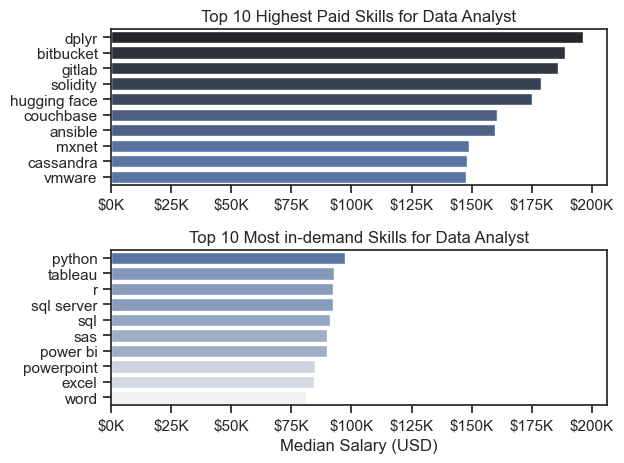

In [6]:
# Top 10 Highest Paid Skills for Data Analyst (2 GRAFICS)

# PARTE 1

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


#PARTE 1: EXPLODE EN SKILLS

df_DA_US =df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]




# PARTE 2:  GROUP BY 

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending =False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending = False).head(10).sort_values(by='median',ascending=False)


# PARTE 3: GRAFIC 

fig, ax = plt.subplots(2,1)

#SEABORN
sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data= df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median',palette = 'light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most in-demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


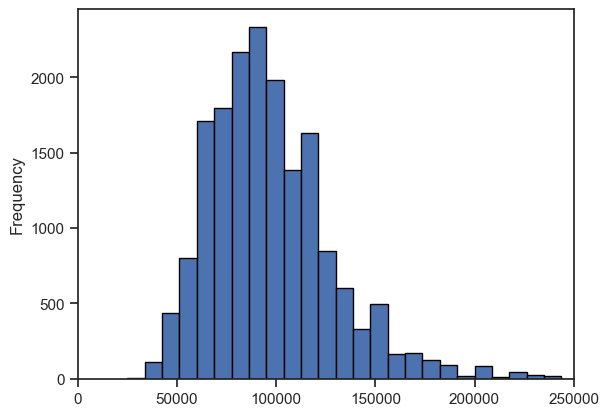

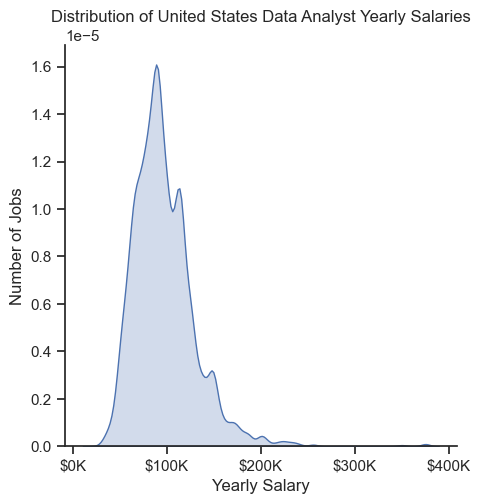

In [9]:
# Distribution of United States Data Analyst Yearly Salaries

df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')

#EDICION GRAFICO: 
plt.xlim(0,250000)

sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

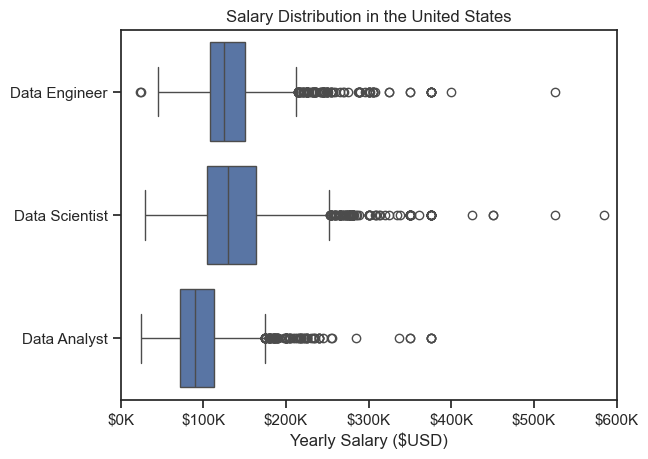

In [12]:
#SALARY DISTRIBUTION ON THE UNITED STATES - BOX PLOT

job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

#PLOT WITH SEABORN: 

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)

ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

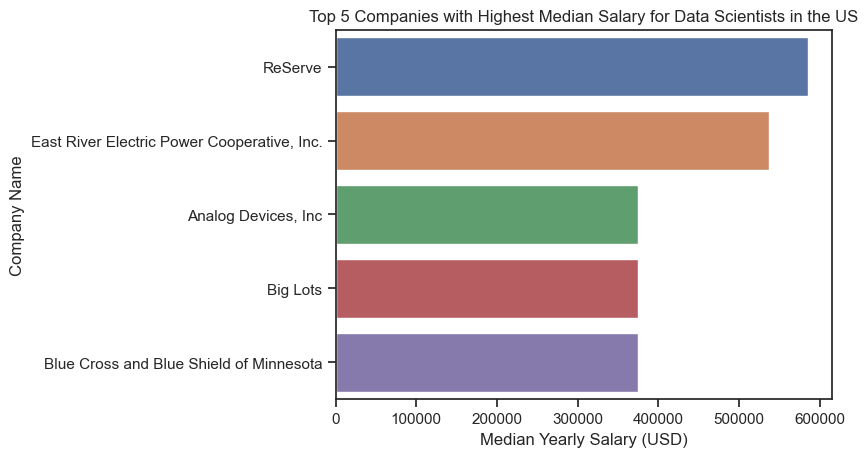

In [15]:
# Top Companies Bar Plot

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

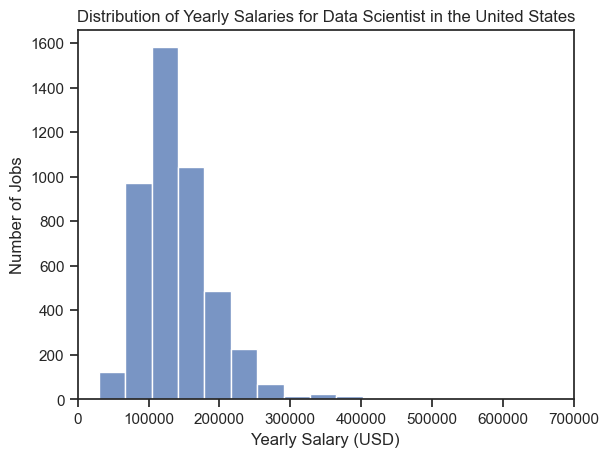

In [ ]:
# Data Scientist Salary Histogram 

# Filter for Data Scientist job postings in the United States
us_ds_jobs = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()

# Drop NaN values from the 'salary_year_avg' column
us_ds_jobs = us_ds_jobs.dropna(subset=['salary_year_avg'])

# Plot histogram for yearly average salary
sns.histplot(us_ds_jobs['salary_year_avg'], bins=25, kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()

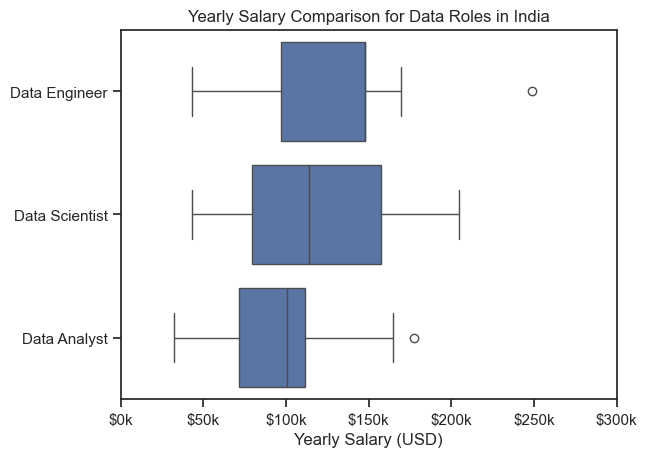

In [18]:
# Data Roles Salary Box Plot

# Filter for Data Analyst, Data Engineer, and Data Scientist job postings in India
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
india_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

# Drop NaN values from the 'salary_year_avg' column
india_jobs = india_jobs.dropna(subset=['salary_year_avg'])

# Plot box plot for yearly average salary
sns.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

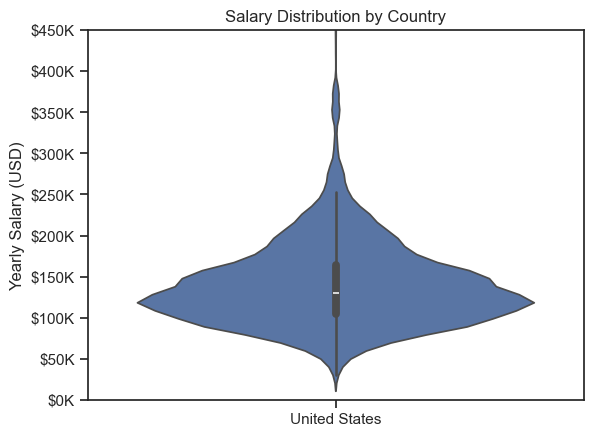

In [19]:
# Salary Distribution for United States 

# Filter the DataFrame for Data Scientist job postings in the United States
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
# Plot chart
sns.violinplot(x='job_country', y='salary_year_avg', data=df_DS_US)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()